<a href="https://colab.research.google.com/github/Cristobalm26/Actividades_EIE401/blob/main/Actividades/Actividad_5/Actividad_5_Cristobal_Moraga_19841682_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


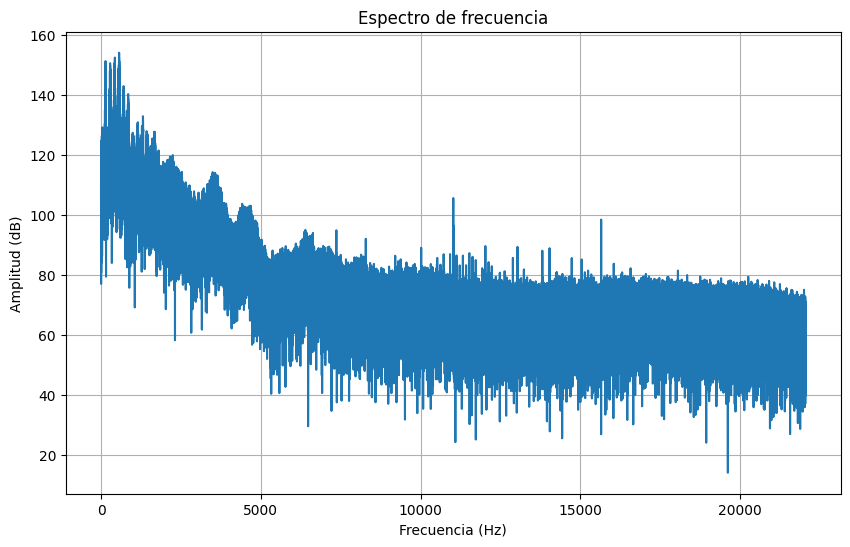

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_audio_fft(file_path):
    # Cargar el archivo WAV
    sample_rate, data = wav.read(file_path)

    # Asegurarse de que sea mono
    if len(data.shape) > 1:
        data = data[:, 0]  # Se toma solo un canal si es estéreo

    # Transformada de Fourier
    fft_data = np.fft.fft(data)
    fft_freqs = np.fft.fftfreq(len(data), 1 / sample_rate)

    # Tomar solo la mitad de los datos (positivos)
    half_len = len(data) // 2
    fft_data = np.abs(fft_data[:half_len])
    fft_freqs = fft_freqs[:half_len]

    # Grafica del espectro de frecuencia
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freqs, 20 * np.log10(fft_data))  # Escala logarítmica para mejor visualización
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title('Espectro de frecuencia')
    plt.grid(True)
    plt.show()

plot_audio_fft('/content/drive/MyDrive/Colab Notebooks/Exercise2.7_adultmale_b_d2.wav')


## 2. Obtén el espectrograma de tu señal de audio

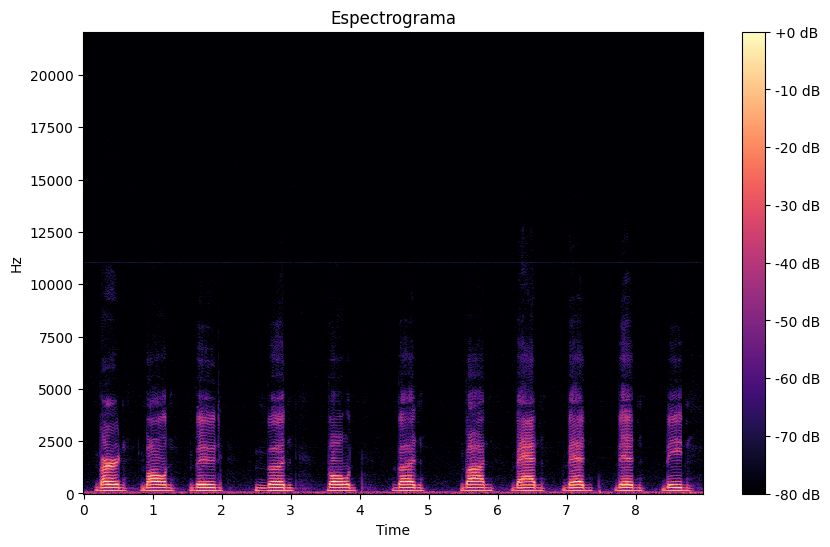

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_audio_spectrogram(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Calculo del espectrograma
    spectrogram = np.abs(librosa.stft(y))

    # Grafico del espectrograma
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma')
    plt.show()


plot_audio_spectrogram('/content/drive/MyDrive/Colab Notebooks/Exercise2.7_adultmale_b_d2.wav')



## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

![image.png](attachment:image.png)

In [18]:
import numpy as np
import scipy.io.wavfile as wav

def slice_audio(file_path, slice_length_sec, overlap_samples):
    sample_rate, data = wav.read(file_path)

    # Asegurarse de que sea mono
    if len(data.shape) > 1:
        data = data[:, 0]  # Toma solo un canal si es estéreo

    # Calculo del número de muestras por slice
    slice_length_samples = int(slice_length_sec * sample_rate)

    # Calculo del número de slices con el overlap dado
    num_slices = (len(data) - slice_length_samples) // (slice_length_samples - overlap_samples) + 1

    # Array para almacenar los slices
    slices = []

    # Fragmentar la señal de audio en slices
    for i in range(num_slices):
        start = i * (slice_length_samples - overlap_samples)
        end = start + slice_length_samples
        slice_data = data[start:end]
        slices.append(slice_data)

    # Añadir el último slice si hay muestras restantes
    if end < len(data):
        last_slice = data[end:]
        slices.append(last_slice)

    return slices

# Parámetros para el slicing
slice_length_sec = 5  # Longitud temporal de cada slice en segundos
overlap_samples = 500  # Solapamiento en número de muestras

slices = slice_audio('/content/drive/MyDrive/Colab Notebooks/Exercise2.7_adultmale_b_d2.wav', slice_length_sec, overlap_samples)

print("Número de slices:", len(slices))


Número de slices: 2


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


<ipython-input-21-6c6dfd8340ad>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  slices_tensors = [torch.tensor(slice_data, dtype=torch.float32) for slice_data in slices]


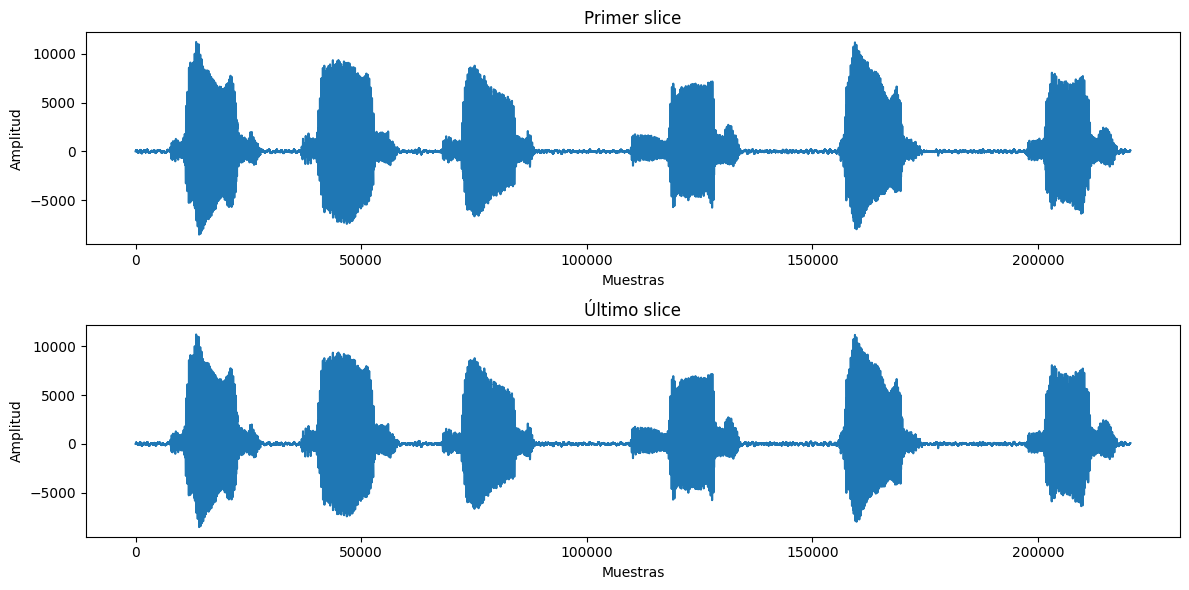

Reproduciendo audio original:
Reproduciendo primer slice:


In [21]:
import numpy as np
import scipy.io.wavfile as wav
import torch
import matplotlib.pyplot as plt

def slice_audio_pytorch(file_path, slice_length_sec, overlap_samples):
    sample_rate, data = wav.read(file_path)


    if len(data.shape) > 1:
        data = data[:, 0]  # Toma solo un canal si es estéreo

    # Convertir la señal de audio a un tensor de PyTorch
    audio_tensor = torch.tensor(data, dtype=torch.float32)

    # Calculo del número de muestras por slice
    slice_length_samples = int(slice_length_sec * sample_rate)

    # Calculo del número de slices con el overlap dado
    num_slices = (len(data) - slice_length_samples) // (slice_length_samples - overlap_samples) + 1

    # Array para almacenar los slices
    slices = []

    # Fragmentar la señal de audio en slices
    for i in range(num_slices):
        start = i * (slice_length_samples - overlap_samples)
        end = start + slice_length_samples
        slice_data = audio_tensor[start:end]
        slices.append(slice_data)

    return sample_rate, slices

# Parámetros para el slicing
slice_length_sec = 5  # Longitud temporal de cada slice en segundos
overlap_samples = 500  # Solapamiento en número de muestras

# Slice de la señal de audio usando PyTorch
sample_rate, slices = slice_audio_pytorch('/content/drive/MyDrive/Colab Notebooks/Exercise2.7_adultmale_b_d2.wav', slice_length_sec, overlap_samples)

# Convertir los slices en tensores PyTorch
slices_tensors = [torch.tensor(slice_data, dtype=torch.float32) for slice_data in slices]

# Graficar un par de slices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(slices[0])
plt.title('Primer slice')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.subplot(2, 1, 2)
plt.plot(slices[-1])
plt.title('Último slice')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Reproducir el audio original y el primer slice
from IPython.display import Audio

# Reproducir el audio original
print("Reproduciendo audio original:")
Audio('/content/drive/MyDrive/Colab Notebooks/Exercise2.7_adultmale_b_d2.wav')

# Reproducir el primer slice
print("Reproduciendo primer slice:")
Audio(data=slices[0], rate=sample_rate)


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

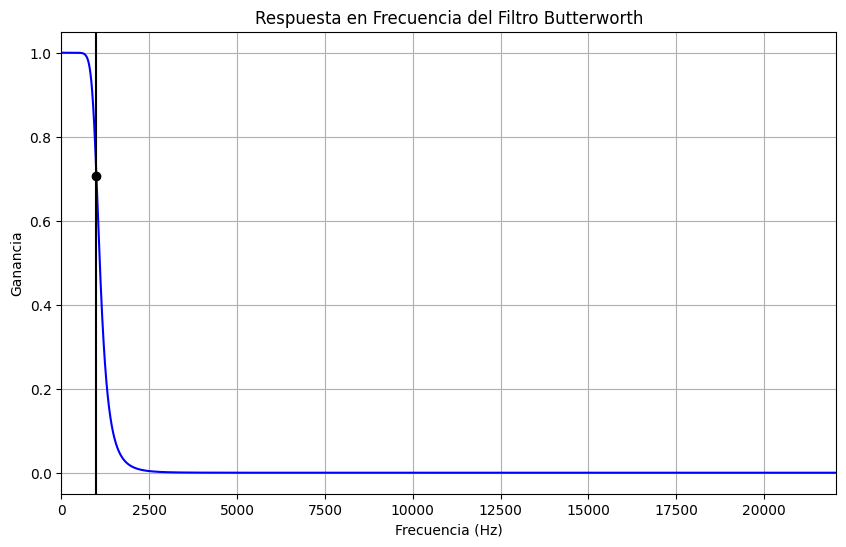

In [24]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parámetros del filtro
order = 6
fs = sample_rate  # Frecuencia de muestreo
cutoff_hz = 1000  # Frecuencia de corte en Hz

# Aplicar el filtro Butterworth al primer slice de la señal de audio
filtered_slice = butter_lowpass_filter(slices[0], cutoff_hz, fs, order)

# Graficar la respuesta en frecuencia del filtro Butterworth
b, a = butter_lowpass(cutoff_hz, fs, order)
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(cutoff_hz, 0.5 * np.sqrt(2), 'ko')
plt.axvline(cutoff_hz, color='k')
plt.xlim(0, 0.5 * fs)
plt.title("Respuesta en Frecuencia del Filtro Butterworth")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.show()


Este código aplica un filtro Butterworth al primer slice de la señal de audio y muestra la respuesta en frecuencia del filtro Butterworth diseñado. El eje x del gráfico representa la frecuencia, mientras que el eje y representa la ganancia (magnitud) del filtro. La línea vertical marca la frecuencia de corte del filtro.

El filtro Butterworth es un tipo de filtro de respuesta de frecuencia suave que se caracteriza por tener una respuesta en frecuencia plana en la banda de paso y una caída gradual en la banda de parada. Se puede observar cómo la ganancia del filtro disminuye gradualmente a medida que la frecuencia se aleja de la frecuencia de corte. Esto indica cómo el filtro atenúa las frecuencias por encima de la frecuencia de corte, permitiendo pasar solo las frecuencias más bajas.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
